In [2]:
# importing required files

import numpy as np
import pandas as pd
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import seaborn as sns

import re

from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'sklearn'

In [2]:
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.describe(include='all')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,c4cd3c8089883f90,Hi! Welcome to Wikipedia. Just wanted to let y...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
print(pd.isnull(train_df).sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


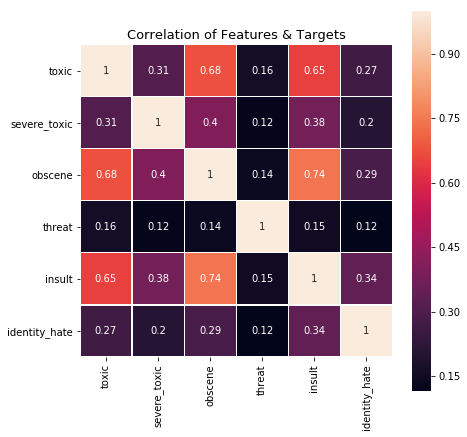

In [6]:
plt.figure(figsize=(7,7))
plt.title('Correlation of Features & Targets',y=1,size=13)
sns.heatmap(train_df[target_columns].astype(float).corr(),linewidths=0.2,vmax=1.0,square=True,annot=True)
plt.show()

In [7]:
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('\'ll', ' will'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('\'ve', ' have'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('don\'t', ' do not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('dont', ' do not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('aren\'t', ' are not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('won\'t', ' will not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('wont', ' will not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('can\'t', ' cannot'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('cant', ' cannot'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('shan\'t', ' shall not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('shant', ' shall not'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace('\'m', ' am'))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("doesn't", "does not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("doesnt", "does not"))                                                      
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "didn't", "did not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "didnt", "did not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("hasn't", "has not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("hasnt", "has not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("haven't", "have not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("havent", "have not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("wouldn't", "would not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "didn't", "did not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "didnt", "did not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("it's" , "it is"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace( "that's" , "that is"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("weren't" , "were not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace("werent" , "were not"))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace(' u ', ' you '))
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: x.replace(' U ', ' you '))

In [8]:
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('\'ll', ' will'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('\'ve', ' have'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('don\'t', ' do not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('dont', ' do not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('aren\'t', ' are not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('won\'t', ' will not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('wont', ' will not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('can\'t', ' cannot'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('cant', ' cannot'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('shan\'t', ' shall not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('shant', ' shall not'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace('\'m', ' am'))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("doesn't", "does not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("doesnt", "does not"))                                                      
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "didn't", "did not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "didnt", "did not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("hasn't", "has not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("hasnt", "has not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("haven't", "have not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("havent", "have not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("wouldn't", "would not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "didn't", "did not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "didnt", "did not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("it's" , "it is"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace( "that's" , "that is"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("weren't" , "were not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace("werent" , "were not"))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace(' u ', ' you '))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: x.replace(' U ', ' you '))

In [9]:
# Removing special characters using regular expression
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: re.sub('[\(\)\"\t_\n.,:=!@#$%^&*-/[\]?|1234567890—]', ' ', x).strip())
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: re.sub('[\(\)\"\t_\n.,:=!@#$%^&*-/[\]?|1234567890—]', ' ', x).strip())

In [10]:
vectorizer = TfidfVectorizer(max_df=1.2,
               smooth_idf=1, max_features=300000)

In [11]:
X =  vectorizer.fit_transform(train_df['comment_text'])
X_ = vectorizer.transform(test_df['comment_text'])
Y = train_df[target_columns]

In [12]:
print(X.shape, X_.shape, Y.shape, test_df.shape)

(159571, 172600) (153164, 172600) (159571, 6) (153164, 2)


In [13]:
from sklearn.linear_model import LogisticRegression
submission = test_df['id']
logreg = LogisticRegression(C=8, max_iter=10000, dual=True)
submission = pd.DataFrame.from_dict({'id': test_df['id']})
for i in target_columns:
    logreg.fit(X, Y[i])
    submission.loc[:,i] = logreg.predict_proba(X_)[:,1]
    print(i)

toxic
severe_toxic
obscene
threat
insult
identity_hate


In [14]:
submission.to_csv('test_submissionp.csv', index=False)

In [15]:
submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999935,0.164287,0.999734,0.072919,0.972960,0.343404
1,0000247867823ef7,0.001323,0.000522,0.000490,0.000068,0.002175,0.001183
2,00013b17ad220c46,0.016805,0.001975,0.006775,0.000502,0.008862,0.002077
3,00017563c3f7919a,0.000639,0.001628,0.000892,0.000251,0.002133,0.000121
4,00017695ad8997eb,0.004238,0.001238,0.002134,0.000481,0.002730,0.000890
5,0001ea8717f6de06,0.003866,0.000253,0.001456,0.000398,0.006021,0.000690
6,00024115d4cbde0f,0.000426,0.000136,0.000761,0.000080,0.001020,0.000215
7,000247e83dcc1211,0.601075,0.001289,0.029171,0.000964,0.059677,0.001181
8,00025358d4737918,0.003739,0.000637,0.002238,0.000178,0.001771,0.001173
9,00026d1092fe71cc,0.001353,0.000168,0.001463,0.000105,0.004875,0.000451
